# **STATISTICAL FOUNDATION FOR MACHINE LEARNING**

Why Statistics Before Machine Learning?
Machine Learning is applied statistics at scale.

**Key statistical foundations:**

• Hypothesis testing for decision-making

• Regression for prediction and inference

• p-values and confidence intervals for uncertainty

**Healthcare relevance in Kenya:**

• Logistic regression for hypertension risk prediction

• Survival analysis for HIV treatment outcomes

• Statistics ensures transparent and responsible AI

Key message:
Machine learning without statistics becomes a black box.
Why Statistics Before Machine Learning?
Machine Learning is applied statistics at scale.

**Key statistical foundations:**

• Hypothesis testing for decision-making

• Regression for prediction and inference

• p-values and confidence intervals for uncertainty

**Healthcare relevance in Kenya:**

• Logistic regression for hypertension risk prediction

• Survival analysis for HIV treatment outcomes

• Statistics ensures transparent and responsible AI

Key message:
Machine learning without statistics becomes a black box.


### **Load the Reequired Libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read the Data to Colab Environment**

In [ ]:
uploaded = files.upload()

Saving htn_dat.csv to htn_dat.csv


### **Read the Data as Data Frame into Colab Environment**

In [ ]:
df = pd.read_csv('htn_dat.csv')
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120
0,16097,60,90,NaN,28.000000,0.0,0,NaN,NaN,338,1,1,0,NaN,0.924379,0
1,930,75,110,27.339912,26.458590,1.0,0,-3.9,0.0,439,1,1,1,5.421770e-02,1.163862,0
2,6877,60,80,17.689789,42.951405,0.0,0,-3.2,NaN,752,1,1,0,-3.597409e-01,0.721148,0
3,36464,60,90,19.854080,50.149212,1.0,1,NaN,NaN,526,1,1,1,NaN,0.829452,0
4,36180,60,100,21.295294,30.554415,0.0,1,-0.4,NaN,215,1,1,0,-1.000000e-07,0.856046,0


### **Visualize the Table of Variables and their Definitions**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary
variables_dict = pd.DataFrame({
    'Variable': [
        'ID', 'DBP', 'SBP', 'BMI', 'age', 'married', 'male.gender',
        'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive',
        'urban.clinic', 'log_creat_centered', 'IPW_weight', 'SBP_ge120'
    ],
    'Type': [
        'Integer', 'Integer', 'Integer', 'Float', 'Float', 'Binary', 'Binary',
        'Float', 'Binary', 'Integer', 'Binary', 'Binary',
        'Binary', 'Float', 'Float', 'Binary'
    ],
    'Description': [
        'Unique patient identifier',
        'Diastolic blood pressure',
        'Systolic blood pressure',
        'Body Mass Index',
        'Patient age in years',
        'Marital status',
        'Gender indicator',
        'Hemoglobin (centered around mean)',
        'Advanced HIV disease status',
        'Survival time in days',
        'Event indicator (hypertension onset)',
        'Antiretroviral therapy naive status',
        'Clinic location',
        'Log-transformed creatinine (centered)',
        'Inverse probability weighting weight',
        'Hypertension indicator (SBP ≥ 120 mmHg)'
    ],
    'Values / Units': [
        'Unique ID',
        'mmHg',
        'mmHg',
        'kg/m²',
        'Years',
        '1 = Married, 0 = Not married',
        '1 = Male, 0 = Female',
        'g/dL (mean-centered)',
        '1 = Yes, 0 = No, NA = Missing',
        'Days',
        '1 = Event occurred, 0 = Censored',
        '1 = Naive, 0 = Experienced',
        '1 = Urban, 0 = Rural',
        'log(mg/dL) (centered)',
        'Continuous weight',
        '1 = Hypertensive, 0 = Normotensive'
    ],
    'Notes': [
        'The-identified patient ID',
        'Normal range: 60–80 mmHg',
        'Primary outcome variable',
        'Missing values present (NA)',
        'Range: 16–80 years',
        'Self-reported status',
        'Biological sex assigned at birth',
        'Centered = raw value minus cohort mean',
        'CD4 <200 cells/μL or WHO Stage 3/4',
        'Time to hypertension diagnosis or censoring',
        'Primary outcome for survival analysis',
        'Never received ARVs before enrollment',
        'Based on clinic administrative location',
        'Centered for modeling stability',
        'For causal inference adjustment',
        'Clinical threshold per WHO guidelines'
    ]
})

# Display as styled table
display(HTML(
    variables_dict.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
ID,Integer,Unique patient identifier,Unique ID,The-identified patient ID
DBP,Integer,Diastolic blood pressure,mmHg,Normal range: 60–80 mmHg
SBP,Integer,Systolic blood pressure,mmHg,Primary outcome variable
BMI,Float,Body Mass Index,kg/m²,Missing values present (NA)
age,Float,Patient age in years,Years,Range: 16–80 years
married,Binary,Marital status,"1 = Married, 0 = Not married",Self-reported status
male.gender,Binary,Gender indicator,"1 = Male, 0 = Female",Biological sex assigned at birth
hgb_centered,Float,Hemoglobin (centered around mean),g/dL (mean-centered),Centered = raw value minus cohort mean
adv_HIV,Binary,Advanced HIV disease status,"1 = Yes, 0 = No, NA = Missing",CD4 <200 cells/μL or WHO Stage 3/4
survtime,Integer,Survival time in days,Days,Time to hypertension diagnosis or censoring


## **Data Cleaning and Preprocessing**

In [ ]:
### Check the Structure of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   DBP                 4999 non-null   int64  
 2   SBP                 4999 non-null   int64  
 3   BMI                 4329 non-null   float64
 4   age                 4999 non-null   float64
 5   married             4835 non-null   float64
 6   male.gender         4999 non-null   int64  
 7   hgb_centered        3605 non-null   float64
 8   adv_HIV             3038 non-null   float64
 9   survtime            4999 non-null   int64  
 10  event               4999 non-null   int64  
 11  arv_naive           4999 non-null   int64  
 12  urban.clinic        4999 non-null   int64  
 13  log_creat_centered  3461 non-null   float64
 14  IPW_weight          4999 non-null   float64
 15  SBP_ge120           4999 non-null   int64  
dtypes: flo

### **Check the Number of Missing Variables for Each Variable**

In [ ]:
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,670
age,0
married,164
male.gender,0
hgb_centered,1394
adv_HIV,1961
survtime,0


### **Delete All Rows with Missing Values**

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2326 non-null   int64  
 1   DBP                 2326 non-null   int64  
 2   SBP                 2326 non-null   int64  
 3   BMI                 2326 non-null   float64
 4   age                 2326 non-null   float64
 5   married             2326 non-null   float64
 6   male.gender         2326 non-null   int64  
 7   hgb_centered        2326 non-null   float64
 8   adv_HIV             2326 non-null   float64
 9   survtime            2326 non-null   int64  
 10  event               2326 non-null   int64  
 11  arv_naive           2326 non-null   int64  
 12  urban.clinic        2326 non-null   int64  
 13  log_creat_centered  2326 non-null   float64
 14  IPW_weight          2326 non-null   float64
 15  SBP_ge120           2326 non-null   int64  
dtypes: float64(

In [ ]:
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,0
age,0
married,0
male.gender,0
hgb_centered,0
adv_HIV,0
survtime,0


### **Data Visualization**

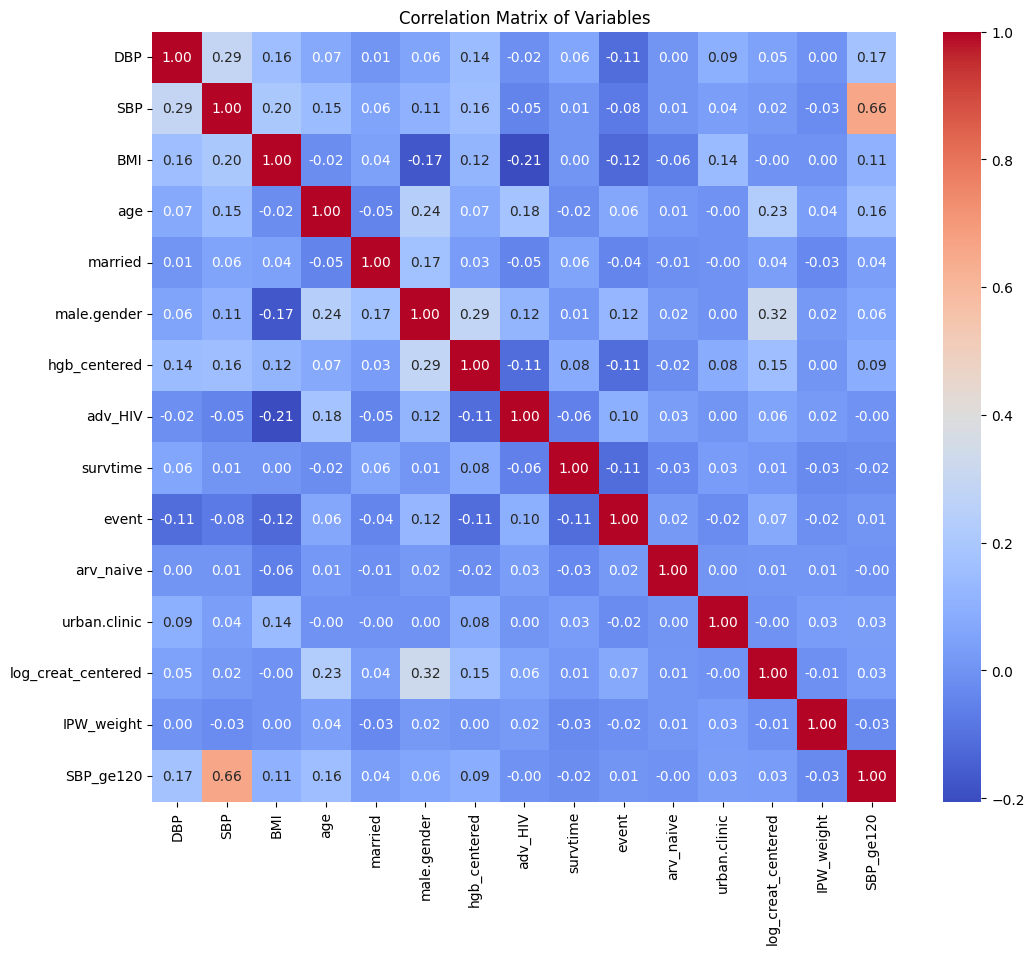

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('ID', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

## **REGRESSION ANALYSIS**

### **Simple Linear Regression Model**

### **State the Null and Alternative Hypothesis**

Null hypothesis: Body Mass Index (BMI) has no statistically significant impact on Systolic Blood Pressure at 5% level of significance.

Alternative hypothesis: Body Mass Index (BMI) has a statistically significant impact on Systolic Blood Pressure at 5% level of significance.

### **Select a Few Variables for Mulptiple OLS**

In [ ]:
y = df['SBP']
X = df['BMI']

In [ ]:
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


In [ ]:
X.head()

,BMI
1,27.339912
11,23.068195
12,21.989893
17,20.983988
22,15.396691


### **Level of Significance**
This analysis is conducted at a 5% level of significance

### **Decide on the Test Statistics**
Since we are interested in the effect of BMI on SyBP, which are all continous, we will estimate a regression equation

### **Conduct the Test**

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,BMI
1,1.0,27.339912
11,1.0,23.068195
12,1.0,21.989893
17,1.0,20.983988
22,1.0,15.396691


In [ ]:
model = sm.OLS(y, X)
results = model.fit()

### **Print the Results**

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           3.96e-23
Time:                        14:57:05   Log-Likelihood:                -9623.3
No. Observations:                2326   AIC:                         1.925e+04
Df Residuals:                    2324   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.8415      1.872     49.587      0.000      89.170      96.513
BMI            0.8572      0.086     10.012      0.000       0.689       1.025
==============================================================================
Omnibus:                      641.236   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.156
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       7.336   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Multiple Linear Regression Model**
This is an extension of the simple linear regression model where predictors are added into the model to improve the performance and prediction accuracy.

### **Select a Few Variables for Mulptiple OLS**
Explicitly define the dependent variable (SBP) and select a few key independent variables for the OLS model based on clinical relevance and correlation with SBP.

In [ ]:
### Select the Predicted Variable
y = df['SBP']

### Select all the Required Predictor Variables
X = df[['DBP', 'age', 'BMI', 'male.gender', 'hgb_centered', 'log_creat_centered']]

In [ ]:
#### View the First Few Obervations of the Predicted Variable
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


In [ ]:
#### View the First Few Observations of the Predictor Variables
X.head()

,DBP,age,BMI,male.gender,hgb_centered,log_creat_centered
1,75,26.458590,27.339912,0,-3.90,0.054218
11,60,40.531143,23.068195,1,-3.93,0.223143
12,53,32.919918,21.989893,0,-1.30,-0.278203
17,70,36.596851,20.983988,1,1.10,0.013621
22,75,42.488705,15.396691,1,-0.80,0.068993


### **Add the Constant to the Data**
 Before performing OLS regression, it is standard practice to add a constant (intercept) term to the independent variables matrix X. This allows the model to estimate the intercept.

In [ ]:
#### Import the statsmodels.api as sm
import statsmodels.api as sm

#### Now add the Constant to the Dataset
X = sm.add_constant(X)

X.head()   #### View the Dataset with added constant

,const,DBP,age,BMI,male.gender,hgb_centered,log_creat_centered
1,1.0,75,26.458590,27.339912,0,-3.90,0.054218
11,1.0,60,40.531143,23.068195,1,-3.93,0.223143
12,1.0,53,32.919918,21.989893,0,-1.30,-0.278203
17,1.0,70,36.596851,20.983988,1,1.10,0.013621
22,1.0,75,42.488705,15.396691,1,-0.80,0.068993


Now that the dependent and independent variables are prepared, including the constant for the intercept, the next logical step is to perform the Ordinary Least Squares (OLS) regression using statsmodels and fit the model.

In [ ]:
### Initialize the Model Development Process
model = sm.OLS(y, X)

In [ ]:
#### Fit the OLS Model
model_results = model.fit()


In [ ]:
#### Get the Summary of the Fitted Model
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     65.95
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           6.76e-76
Time:                        14:57:15   Log-Likelihood:                -9489.1
No. Observations:                2326   AIC:                         1.899e+04
Df Residuals:                    2319   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.6884      2.734     22.926      0.000      57.326      68.050
DBP                    0.3744      0.030     12.444      0.000       0.315       0.433
age                    0.1711      0.029      5.845      0.000       0.114       0.228
BMI                    0.7386      0.085      8.740      0.000       0.573       0.904
male.gender            3.5317      0.797      4.429      0.000       1.968       5.095
hgb_centered           0.4275      0.119      3.606      0.000       0.195       0.660
log_creat_centered    -3.1331      1.034     -3.031      0.002      -5.160      -1.106
==============================================================================
Omnibus:                      610.617   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2419.433
Skew:                           1.233   Prob(JB):                         0.00
Kurtosis:                       7.346   Cond. No.                         743.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SyBP = 62.6882 + 0.3744 (DBP) + 0.1711(Age) + 0.7386 (BMI) + 3.5317 (Gender) + 0.4275 (hgb_centered) - 3.1331(log_creat_centered)


In [ ]:
SyBP = 62.6882 + 0.3744 * 110 + 0.1711 * 26 + 0.7386 * 23 + 3.5317 * 1 + 0.4275 * 1.24 - 3.1331 * 1.17
print(SyBP)

125.70467300000001


### **Interpretation of OLS Regression Results**

Based on the OLS Regression Results, we can draw the following interpretations:

*   **R-squared:** The R-squared value is 0.146, which means that approximately 14.6% of the variance in SBP (Systolic Blood Pressure) can be explained by the independent variables included in the model (DBP, age, BMI, male.gender, hgb_centered, and log_creat_centered). This indicates that while the model is statistically significant, a large portion of the variance in SBP is still unexplained by these variables.

*   **F-statistic and Prob (F-statistic):** The F-statistic is 65.95 with a very low p-value (6.76e-76), which is less than 0.05. This indicates that the overall regression model is statistically significant, meaning that at least one of the independent variables significantly predicts SBP.

*   **Coefficients and P-values:**
    *   **const (Intercept):** The intercept is 62.6884. This is the estimated SBP when all independent variables are zero.
    *   **DBP (Diastolic Blood Pressure):** The coefficient is 0.3744, with a p-value of 0.000. This suggests that for every one-unit increase in DBP, SBP is expected to increase by 0.3744 units, holding all other variables constant. This relationship is highly statistically significant.
    *   **age:** The coefficient is 0.1711, with a p-value of 0.000. For every one-year increase in age, SBP is expected to increase by 0.1711 units, holding other variables constant. This is also highly statistically significant.
    *   **BMI (Body Mass Index):** The coefficient is 0.7386, with a p-value of 0.000. A one-unit increase in BMI is associated with a 0.7386 unit increase in SBP, holding other variables constant. This is a strong and highly significant positive relationship.
    *   **male.gender:** The coefficient is 3.5317, with a p-value of 0.000. This indicates that, on average, males have an SBP that is 3.5317 units higher than females (assuming male.gender = 1 for males and 0 for females), holding other variables constant. This is a statistically significant difference.
    *   **hgb_centered (Hemoglobin centered):** The coefficient is 0.4275, with a p-value of 0.000. For every one-unit increase in centered hemoglobin, SBP is expected to increase by 0.4275 units, holding other variables constant. This relationship is statistically significant.
    *   **log_creat_centered (Log-transformed creatinine centered):** The coefficient is -3.1331, with a p-value of 0.002. This suggests that for every one-unit increase in centered log-creatinine, SBP is expected to decrease by 3.1331 units, holding other variables constant. This is a statistically significant inverse relationship.

*   **Omnibus and Jarque-Bera:** These tests check for normality of residuals. The low p-values (0.000 for both) suggest that the residuals are not normally distributed, which might indicate that the model's assumptions are violated or that there are uncaptured non-linear relationships or important omitted variables.

*   **Durbin-Watson:** The Durbin-Watson statistic is 2.052, which is close to 2. This suggests that there is little to no autocorrelation in the residuals, which is a good sign.

## **Summary:**
In this lab practice we define the dependent and independent variables, prepare the data, perform OLS regression, and interpret the results. The interpretation is as follows:
The OLS model indicates that approximately 14.6% of the variance in Systolic Blood Pressure (SBP) can be explained by Diastolic Blood Pressure (DBP), age, Body Mass Index (BMI), gender (male), centered hemoglobin (hgb\_centered), and centered log-transformed creatinine (log\_creat\_centered). The overall model is statistically significant (F-statistic = 65.95, p-value < 0.001). All selected independent variables are statistically significant predictors of SBP. However, diagnostic tests suggest that the residuals are not normally distributed, while there is no significant autocorrelation.

### **Data Analysis Key Findings**
*   The OLS model explained 14.6% of the variance in SBP (R-squared = 0.146), indicating that a substantial portion of SBP variability remains unexplained by the selected variables.
*   The overall regression model is highly statistically significant (F-statistic = 65.95, p-value = 6.76e-76), suggesting that at least one independent variable significantly predicts SBP.
*   All independent variables included in the model are statistically significant predictors of SBP (p-values < 0.05).
    *   DBP (coefficient = 0.3744), age (coefficient = 0.1711), BMI (coefficient = 0.7386), male.gender (coefficient = 3.5317), and hgb\_centered (coefficient = 0.4275) show a positive association with SBP.
    *   log\_creat\_centered (coefficient = -3.1331) shows a negative association with SBP.
*   The residuals of the model are not normally distributed (Omnibus and Jarque-Bera tests p-values = 0.000), which might indicate violations of OLS assumptions or uncaptured relationships.
*   There is little to no autocorrelation in the residuals (Durbin-Watson statistic = 2.052).

### **Insights or Next Steps**
*   Given the relatively low R-squared and non-normal residuals, further investigation into additional relevant variables or non-linear relationships with SBP could improve the model's explanatory power and fit.
*   Explore transformations of the dependent variable or independent variables, or consider alternative regression models (e.g., robust regression, generalized linear models) that do not assume normally distributed residuals to address the observed non-normality.


### **Additional Linear Regression Model**

In [ ]:
### Load the Necessary Libraries and Functionalities
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#### Iniatialize Data Importation
uploaded = files.upload()

Saving research_data.csv to research_data.csv


In [ ]:
#### Prepare the Data as Data Frame
df = pd.read_csv('research_data.csv')
df.head()

,year,gdp,Private_investment,income_tax,value_added_tax,import_tax
0,1973,15790,3645.0,1124.8,639.80,795.44
1,1974,18776,4075.0,1531.4,937.26,842.24
2,1975,21140,4837.0,1796.8,1185.48,983.62
3,1976,25562,5808.0,2149.4,1308.44,1057.18
4,1977,32699,7800.0,2846.8,1855.26,2083.94


In [ ]:
### Select the Target Variable
y = df['Private_investment']
y.head()

,Private_investment
0,3645.0
1,4075.0
2,4837.0
3,5808.0
4,7800.0


In [ ]:
### Select the Predictor Variables
X = df[['income_tax', 'value_added_tax', 'import_tax']]
X.head()

,income_tax,value_added_tax,import_tax
0,1124.8,639.80,795.44
1,1531.4,937.26,842.24
2,1796.8,1185.48,983.62
3,2149.4,1308.44,1057.18
4,2846.8,1855.26,2083.94


In [ ]:
#### Add the Constant to the Predictor Variables
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,income_tax,value_added_tax,import_tax
0,1.0,1124.8,639.80,795.44
1,1.0,1531.4,937.26,842.24
2,1.0,1796.8,1185.48,983.62
3,1.0,2149.4,1308.44,1057.18
4,1.0,2846.8,1855.26,2083.94


#### **Estimate the Ordinary Least Square (OLS) Model**

In [ ]:
### Initialize the Model Development Process
model = sm.OLS(y, X)

In [ ]:
#### Fit the  Model
model_results = model.fit()

In [ ]:
#### View the Summary of the Model
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Private_investment   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     42.43
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           8.89e-13
Time:                        16:43:55   Log-Likelihood:                -566.40
No. Observations:                  46   AIC:                             1141.
Df Residuals:                      42   BIC:                             1148.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.552e+04   1.51e+04     

PI = 15520-1.0260 (Income Tax) + 1.7515 (Value Addedd Tax) + 4.2486 (Import Tax)

#### **Model Diagnostic and Assumptions Checking**

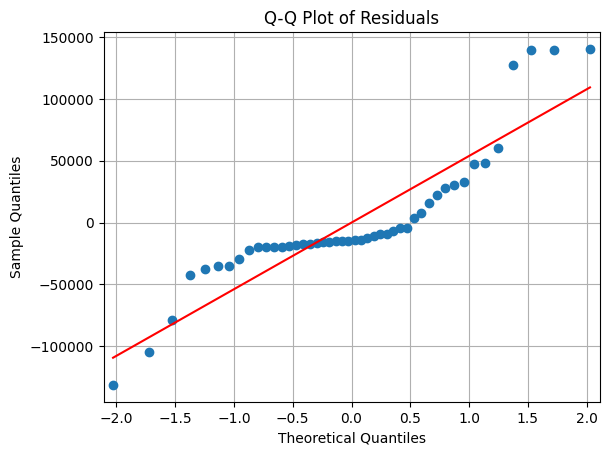

In [ ]:
### 1. Normality of the Residuals
import scipy.stats as stats
import matplotlib.pyplot as plt

##### Get the Residuals from the Model
residuals = model_results.resid

##### a. Plot the Q-Q of the Residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

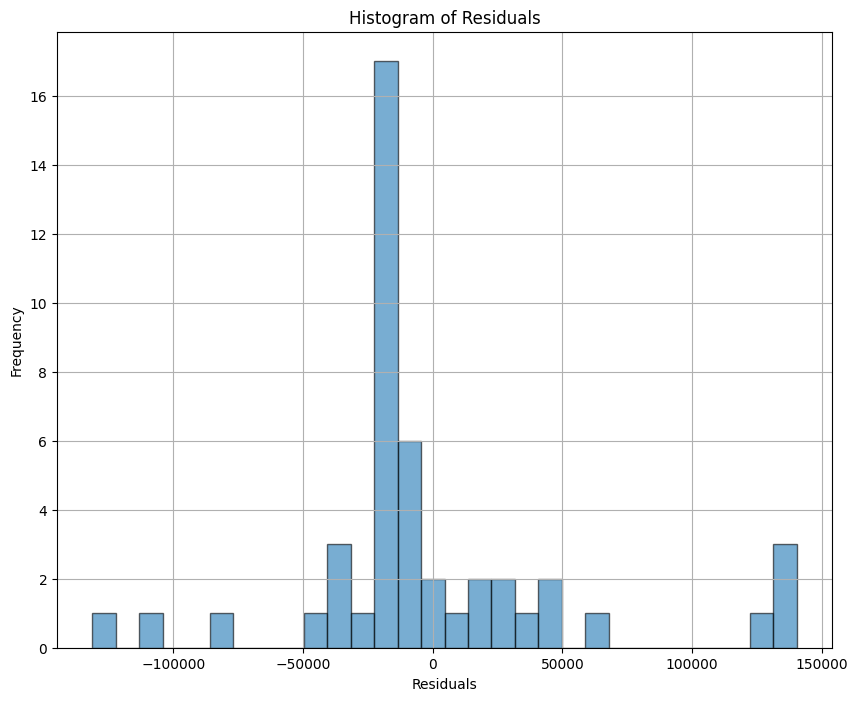

In [ ]:
#### b. Histogram
plt.figure(figsize=(10, 8))
plt.hist(residuals, bins = 30, edgecolor = 'k', alpha =0.6)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#### c. Inferential Test for Normality

##### In this test for normality we used Jarque-Bera test for Normality to assess whether the residuals
##### Follows a normal distribution
jb_statistic, p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera Test Statistic: {jb_statistic}")
print(f"p-value: {p_value}")

Jarque-Bera Test Statistic: 13.679235097154105
p-value: 0.0010705127404790008


* H0: The residuals follows a Normal Distribution

* H1: The residuals do not follow a Normal Distribution

Note: Decision criteria-reject the null hypothesis if an only if the p-value < 0.05

Jarque-Bera Test Statistic: 13.679235097154105

p-value: 0.0010705127404790008

The results indicates that the residuals deviates from a normal distribution, since the p-value is less than 0.05


### 2. Multicollinearity
This is the diagnostic test conducted to veify whether two or more predictors are correlated. This diagnostic is tested using variance inflation factor (VIF)

Decision

* VIF > 10; there is a serious problem with the estimated model
* 5<VIF<10; raises concerns
* 3<VIF<5; this is acceptable shreshold
* 0<VIF<3; this is ideal

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i)
for i in range(X.shape[1])]

vif

,Variable,VIF Factor
0,const,3.281901
1,income_tax,51.492712
2,value_added_tax,74.554129
3,import_tax,24.798249


#### **Heteroscedasticity**
This is a situation where the variance of the error is not constant, that is, it is varying. This assumption requires that the errro term should have a constant variance.

There are two test for heteroscedasticity

* Breusch paga test

* White test

### Hypotheses
* Null hypothesis (H0): The residuals have a constant variance over time

* Alternative hypothesis (H1): The residuals do have have a constant variance over time

Note: Reject the Null Hypothesis if the p-value < 0.05

In [ ]:
#### 1. Breusch paga test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_results.resid, X)

In [ ]:
bp_labels = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))
bp_results

{'Lagrange multiplier statistic': np.float64(16.91095902767206),
 'p-value': np.float64(0.0007371758231115572),
 'f-value': np.float64(8.138921685752019),
 'f p-value': np.float64(0.0002189813347756939)}

In [ ]:
bp_df = pd.DataFrame.from_dict(bp_results,
                     orient = 'index',
                     columns = ['Value']
                     ).reset_index()
bp_df_columns = ['Test Statistic', 'p-value', 'F-Statistic', 'F-p-value']
bp_df

,index,Value
0,Lagrange multiplier statistic,16.910959
1,p-value,0.000737
2,f-value,8.138922
3,f p-value,0.000219


#### **Autocorrelation**

This test is used to check if the residuals are correlated (positively or negatively correlated).